$$
\text{Universidad de Buenos Aires - Facultad de Ciencias Exactas y Naturales - Ciencias de Datos}
$$

$$
\textbf{Laboratorio De Datos}
$$

$$
\small{\text{Primer Cuatrimestre 2024}}
$$


$$
\text{Integrantes:}
$$

$$
\small{\text{Nombre, LU, Mail}}
$$

<p align="center">
Matias Gangui, 155/20, ganguimatias@gmail.com  <br>
Tomas Brucellaria, 287/23, tomasbrus54@gmail.com <br>
Lucas Grasso Ramos, 1187/23, lucasgrassoramos@gmail.com <br>
</p>


# Instalaciones e Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn.objects as so

import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error    # Medidas de desempeño

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from formulaic import model_matrix
from formulaic import Formula

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Parte 1: Procesamiento de datos

In [2]:
df = pd.read_csv('./datasets/sube-2023.csv')
df.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


## Ejercicio 1

**a)** Visualizar el tipo de datos de cada columna.Transformar la columna `"DIA_TRANSPORTE"` para que sea reconocida como una fecha.


In [3]:
df.dtypes

DIA_TRANSPORTE     object
NOMBRE_EMPRESA     object
LINEA              object
AMBA               object
TIPO_TRANSPORTE    object
JURISDICCION       object
PROVINCIA          object
MUNICIPIO          object
CANTIDAD            int64
DATO_PRELIMINAR    object
dtype: object

In [4]:
print(f"Tipo de df['DIA_TRANSPORTE'] antes: {df.DIA_TRANSPORTE.dtype}")
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'])
print(f"Tipo de df['DIA_TRANSPORTE'] despues: {df.DIA_TRANSPORTE.dtype}")

Tipo de df['DIA_TRANSPORTE'] antes: object
Tipo de df['DIA_TRANSPORTE'] despues: datetime64[ns]


**b)** Agregar tres columnas al DataFrame:

In [5]:
dias = {
		'Monday': 'Lunes',
		'Tuesday': 'Martes',
		'Wednesday': 'Miércoles',
		'Thursday': 'Jueves',
		'Friday': 'Viernes',
		'Saturday': 'Sábado',
		'Sunday': 'Domingo'
	}

def traducir_dia(dia:str):
	return dias[dia]

In [6]:
df["FECHA_DIA"] = df["DIA_TRANSPORTE"].dt.day_name().apply(traducir_dia)
df["FECHA_MES"] = df["DIA_TRANSPORTE"].dt.month
df["FECHA_ORDINAL"] = df["DIA_TRANSPORTE"].dt.day_of_year
df.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_MES,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo,1,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Domingo,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo,1,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Domingo,1,1


## Ejercicio 2

Crear el DataFrame `"datos_amba"`, el cual solo debe tener datos de AMBA y debe excluir datos preliminares.

In [7]:
datos_amba = (
	df.copy()
	.query("DATO_PRELIMINAR != 'SI' and AMBA == 'SI'")
	.drop(columns=["DATO_PRELIMINAR", "AMBA", "PROVINCIA", "NOMBRE_EMPRESA", "MUNICIPIO"])
	.reset_index(drop=True)
)

datos_amba.columns = datos_amba.columns.str.lower()
datos_amba = datos_amba.rename(columns={"cantidad": "pasajeros", "dia_transporte": "fecha"})
datos_amba = datos_amba.reindex(sorted(datos_amba.columns), axis=1)
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Domingo,1,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Domingo,1,1,MUNICIPAL,2B,11,COLECTIVO
2,2023-01-01,Domingo,1,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
3,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
4,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


## Ejercicio 3

**a)** Mostrar la proporción de la cantidad total anual de _pasajeros_ que le corresponde a cada medio de transporte

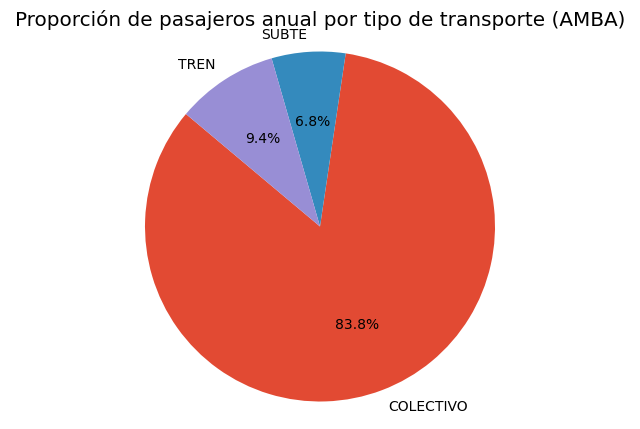

In [8]:
total_pasajeros_anuales = datos_amba["pasajeros"].sum()
proporciones = datos_amba.groupby("tipo_transporte")["pasajeros"].sum() / total_pasajeros_anuales
plt.figure(figsize=(8, 5))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Proporción de pasajeros anual por tipo de transporte (AMBA)")
plt.show()

**b)** La tupla (_mes_, _línea de subte_) donde viajó la mayor cantidad de pasajeros

In [9]:
lineas_de_subte = datos_amba.query("tipo_transporte == 'SUBTE'")
# la siguiente linea agrupa por linea y mes, y suma la cantidad de pasajeros, luego desapila para devolver un dataframe
lineas_de_subte_por_mes = lineas_de_subte.groupby(["linea", "fecha_mes"])["pasajeros"].sum().unstack()
mes_con_mas_pasajeros = lineas_de_subte_por_mes.max().idxmax() # Agarra el indice x (Que seria el mes) del maximo de cada columna
linea_con_mas_pasajeros = lineas_de_subte_por_mes.idxmax()[mes_con_mas_pasajeros] # lineas_de_subte_por_mes.idxmax() devuelve el indice de la fila con el maximo de cada columna
res = (mes_con_mas_pasajeros, linea_con_mas_pasajeros)
print(f"La línea {res[1]} fue la que más pasajeros tuvo en el mes de {res[0]}")
print(f"Es decir, obtenemos la tupla {res}")

La línea LINEA_B fue la que más pasajeros tuvo en el mes de 8
Es decir, obtenemos la tupla (8, 'LINEA_B')


**c)** El día hábil con menor desvío estándar en cantidad de pasajeros

In [10]:
dias_habiles = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
dias_habiles_ordinales = [1, 2, 3, 4, 5]
datos_amba_dias_habiles = datos_amba.query("fecha_dia in @dias_habiles")
dia_min = datos_amba_dias_habiles.groupby("fecha_dia")["pasajeros"].std().idxmin()
print(f"El día hábil con menor desvío estándar en la cantidad de pasajeros es el día {dia_min}")

El día hábil con menor desvío estándar en la cantidad de pasajeros es el día Lunes


# Parte 2: EDA

## Variación de Estudiantes entre Abril y Julio

Proponemos ver la variación de personas que usa colectivos (y tren) que llegan a Ciudad Universitaria en la fecha de inicio de cursada (03/04/23), y compararlas con la fecha de fin de cursada (13/07/23). La idea es analizar si el uso de colectivos que llegan a Ciudad Universitaria decrece a lo largo del cuatrimestre y rompe con la tendencia general del resto de los colectivos. Usaremos el DataFrame `datos_amba` previamente definido.

Para ésto, vamos a querer filtrar nuestro dataframe por los medios de transporte publico que pasan por Ciudad Universitaria:
- Líneas 107, 28, 33, 42, 37, 45, 160  
- Ferrocaril Belgrano Norte

In [11]:
lineas_universitaria = ['LINEA 107','LINEA 28','LINEA 33' ,'LINEA 42','BSAS_LINEA_037', 'BSAS_LINEA_045', 'BSAS_LINEA_160', 'FFCC_BELGRANO_NORTE'] # bondis que pasan por cdad universitaria
mes_inicio = 4 # Abril
mes_fin = 7 # Julio
dia_inicio = 93  # 3 de abril
dia_fin = 194  # 13 de julio
semana_inicio = 0
semana_fin = 13

Luego, le asignamos un peso a cada línea basándonos en estos términos:
$$\text{peso} = \dfrac{\text{cantidad de ramales que pasan por ciudad universitaria}}{\text{cantidad de ramales totales de la línea}}$$

Por ejemplo, El 33 tiene 9 ramales donde sólo 4 pasan por ciudad universitaria.

In [12]:
pesos = {
    'LINEA 107': 1,
    'LINEA 28': 5/12,
    'LINEA 33': 4/9 ,
    'LINEA 42': 1,
    'BSAS_LINEA_037': 2/3,
    'BSAS_LINEA_045': 3/4,
    'BSAS_LINEA_160': 10/15,
    'FFCC_BELGRANO_NORTE' : 1
}

Tomamos como semana habil a aquella que tiene 6 días hábiles. Ya que hay cursada el día sábado.

In [13]:
# Creamos "datos_amba_universitaria" que contiene sólo las líneas que pasan por Ciudad Universitaria
datos_amba_universitaria = datos_amba.query(
    "linea in @lineas_universitaria and fecha_dia != 'Domingo'"
)

# Creamos otras 2 bases de datos que contengan la fecha de inicio, y la fecha de final del dataset creado anteriormente.
datos_amba_universitaria_inicio = datos_amba_universitaria.query("fecha_mes == @mes_inicio")
datos_amba_universitaria_fin = datos_amba_universitaria.query("fecha_mes == @mes_fin")

# Una vez que tenemos estas 2, podemos calcular la variación entre el mes de inicio y de final.
datos_amba_universitaria_fin["pasajeros"].sum() / datos_amba_universitaria_inicio["pasajeros"].sum()

0.9556470278513705

Este valor es la proporcion de pasajeros que viajaron a final de cursada respecto al inicio de cursada.

Esto significa que hubo un decrecimiento del 5% en el uso de éstos colectivos.

Ahora veamos cómo quedaría con nuestros "pesos".

Empezamos creando una funcion que nos permita modificar cada población por el peso indicado en el diccionario `"pesos"`.

In [14]:
def suma_ponderada(data, weights):
    res = 0
    for linea in lineas_universitaria:
        data_linea = data.query("linea == @linea")
        res += weights[linea] * data_linea["pasajeros"].sum()
    return res

In [15]:
# Comparamos nuestros nuevos valores de Abril y Julio
suma_ponderada(datos_amba_universitaria_fin, pesos) / suma_ponderada(datos_amba_universitaria_inicio, pesos)

0.9445054250024284

Notamos un decrecimiento aún mayor que antes.

Comparemos con el total de colectivos que **no** pasan por Ciudad Universitaria:

In [16]:
datos_amba_no_universitaria = datos_amba.query("linea not in @lineas_universitaria and fecha_dia != 'Domingo'")
datos_amba_no_universitaria_inicio = datos_amba_no_universitaria.query("fecha_mes == @mes_inicio")
datos_amba_no_universitaria_fin = datos_amba_no_universitaria.query("fecha_mes == @mes_fin")
datos_amba_no_universitaria_fin["pasajeros"].sum() / datos_amba_no_universitaria_inicio["pasajeros"].sum()

0.9859513173626909

Veamos de generalizarlo, para poder comparar más meses y para ver así la tendencia.

In [17]:
fechas_feriados = pd.to_datetime([ "2023-1-1", "2023-2-20", "2023-2-21", "2023-3-24", "2023-4-2", "2023-4-7", "2023-5-1", "2023-5-25", "2023-6-20", "2023-7-9", "2023-8-21", "2023-10-16", "2023-11-20", "2023-12-8", "2023-12-25", "2023-6-17", "2023-8-17", "2023-10-13", "2023-5-26", "2023-6-19", "2023-10-13"])
univ_sin_feriados = datos_amba_universitaria.query(
    "fecha not in @fechas_feriados and fecha_ordinal >= @dia_inicio and fecha_ordinal <= (@dia_fin + 6)"
)
no_univ_sin_feriados = datos_amba_no_universitaria.query(
    "fecha not in @fechas_feriados and fecha_ordinal >= @dia_inicio  and fecha_ordinal <= (@dia_fin + 6)"
)

In [18]:
groups = univ_sin_feriados.groupby(
    np.arange(len(univ_sin_feriados)) // (8 * 6)
)  # 7 entradas x dia
univ_semanal = groups["pasajeros"].sum()
univ_semanal

0     2391004
1     2702686
2     2621282
3     2684486
4     2687525
5     2709924
6     2596379
7     2504492
8     2694178
9     2576750
10    2584782
11    2498365
12    2194378
13    2323659
14     812808
Name: pasajeros, dtype: int64

In [19]:
n_lineas_no_univ = len(no_univ_sin_feriados["linea"].unique())
groups = no_univ_sin_feriados.groupby(
    np.arange(len(no_univ_sin_feriados)) // (n_lineas_no_univ * 6)
)  # n_lineas_no_univ entradas x dia, 6 dias habiles
no_univ_semanal = groups["pasajeros"].sum()
no_univ_semanal.head()

0    60559046
1    68172271
2    66647327
3    67725005
4    67706001
Name: pasajeros, dtype: int64

Deseamos comparar la proporcion de pasajeros por semana respecto a la primera semana de cursada.

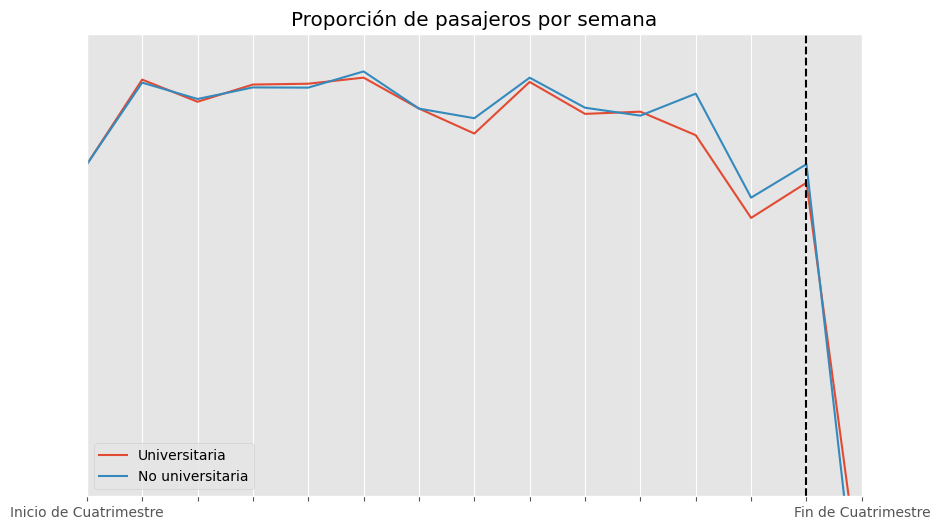

In [20]:
p_univ_semanal = univ_semanal / univ_semanal[0]
p_no_univ_semanal = no_univ_semanal / no_univ_semanal[0]

plt.figure(figsize=(10, 6))
plt.plot(p_univ_semanal, label="Universitaria")
plt.plot(p_no_univ_semanal, label="No universitaria")
plt.title("Proporción de pasajeros por semana")
plt.axvline(x=semana_fin, color="black", linestyle="--")
plt.xticks(
    [x for x in range(0, 15)],
    ["Inicio de Cuatrimestre"] + ["" for _ in range(0, 13)] + ["Fin de Cuatrimestre"],
)
plt.yticks([])
plt.ylim(0.49, 1.2)
plt.xlim(0, 14)
plt.legend()
plt.show()

Se puede ver que la tendencia general es decreciente, pero las lineas "universitarias" rompen tendencia decreciendo más que el resto cercano a la fecha de los segundos parciales.

Probamos graficando ahora las cantidades escaladas, para ver si se puede apreciar mejor la tendencia.

In [21]:
def minmax(s: pd.Series):
    return (s - s.min()) / (s.max() - s.min())

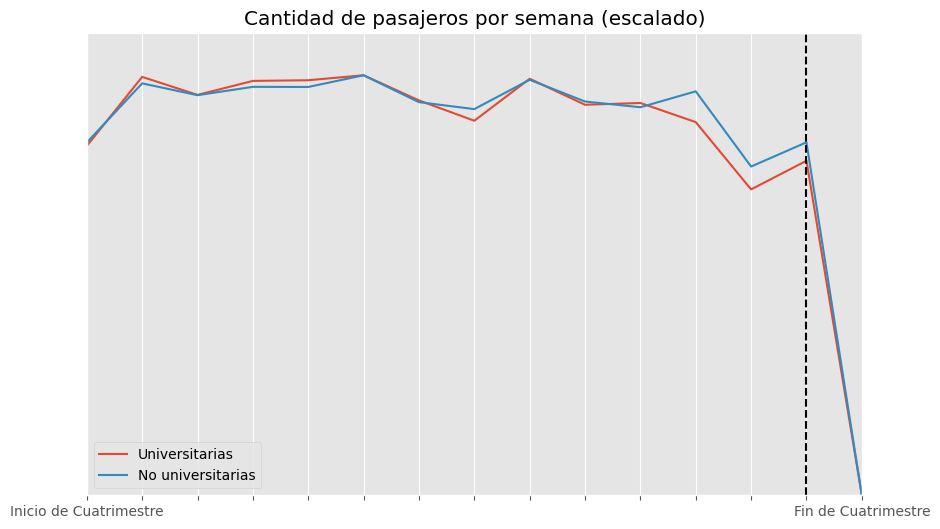

In [22]:
scaled_univ_semanal = minmax(univ_semanal)
scaled_no_univ_semanal = minmax(no_univ_semanal)

# Graficamos la cantidad de pasajeros por semana para las líneas universitarias
plt.figure(figsize=(10, 6))
plt.plot(scaled_univ_semanal)
plt.plot(scaled_no_univ_semanal)
plt.title("Cantidad de pasajeros por semana (escalado)")
plt.axvline(x=semana_fin, color="black", linestyle="--")
plt.xticks(
    [x for x in range(0, 15)],
    ["Inicio de Cuatrimestre"]+ ["" for _ in range(0, 13)] + ["Fin de Cuatrimestre"],
)
# disable y ticks
plt.yticks([])
plt.ylim(0, 1.1)
plt.xlim(0, 14)
plt.legend(["Universitarias", "No universitarias"])
plt.show()

Se continua observando que el uso de los colectivos que pasan por Ciudad Universitaria decrece más que el resto llegando a final de cursada.

## Línea más usada por Estudiantes de Ciudad Universitaria

Usando nuestra suma ponderada, buscamos la linea mas "usada":

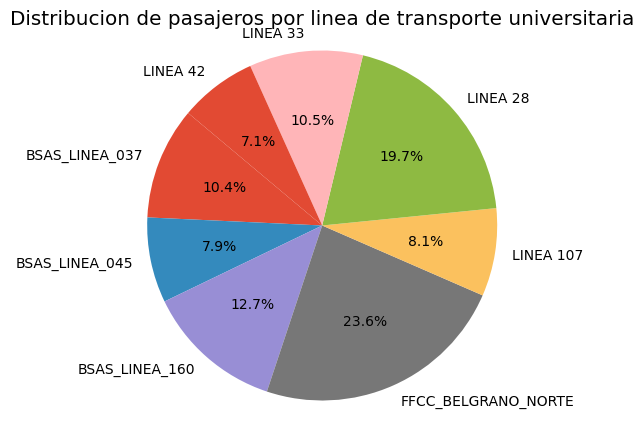

In [23]:
datos_amba_universitaria_ponderados = datos_amba_universitaria.copy()
datos_amba_universitaria_ponderados["peso"] = datos_amba_universitaria_ponderados["linea"].map(pesos)
datos_amba_universitaria_ponderados["pasajeros_ponderados"] = datos_amba_universitaria_ponderados["pasajeros"] * datos_amba_universitaria_ponderados["peso"]
pasajeros_totales = datos_amba_universitaria_ponderados["pasajeros"].sum()
proporciones = datos_amba_universitaria_ponderados.groupby("linea")["pasajeros"].sum() / pasajeros_totales

plt.figure(figsize=(8, 5))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribucion de pasajeros por linea de transporte universitaria")
plt.show()

Lo cual tiene sentido, uno esperaria que el "Belgrano Norte"" y el "28" sean los mas usados. Esperabamos mas del "107", pero no es sorprendente que no sea el mas usado.

## Tendencia Estudiantes en Ciudad Universitaria

Nos gustaria estimar la cantidad de estudiantes que se tomaron cada colectivo en Ciudad Universitaria.

In [24]:
exactas = pd.read_csv('./datasets/Estudiantes_exactas.csv')
exactas.head(6)

,Año,Estudiantes Facultad
0,2017,6381
1,2018,6647
2,2019,6764
3,2020,7207
4,2021,8029
5,2022,7751


In [25]:
fadu = pd.read_csv('./datasets/Estudiantes_fadu.csv')
fadu.head(6)

,Año,Estudiantes Facultad
0,2017,23039
1,2018,22334
2,2019,22518
3,2020,22412
4,2021,23959
5,2022,22595


Como queremos la cantidad de Estudiantes de todo Ciudad Universitaria, agrupamos los Datasets

In [26]:
estudiantes = fadu.copy().drop(columns=["Estudiantes Facultad"])
estudiantes["fadu"] = fadu["Estudiantes Facultad"]
estudiantes["exactas"] = exactas["Estudiantes Facultad"]
estudiantes["totales"] = fadu["Estudiantes Facultad"] + exactas["Estudiantes Facultad"]
estudiantes.head(10)

,Año,fadu,exactas,totales
0,2017,23039,6381,29420
1,2018,22334,6647,28981
2,2019,22518,6764,29282
3,2020,22412,7207,29619
4,2021,23959,8029,31988
5,2022,22595,7751,30346


Ploteamos estudiantes totales por año, luego separamos por facultad.

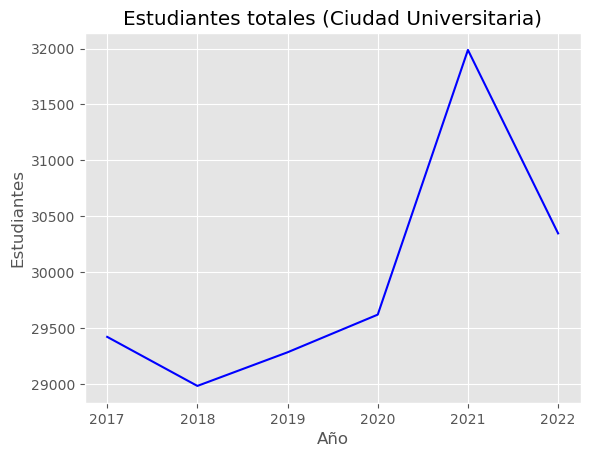

In [27]:
plt.plot(estudiantes["Año"], estudiantes["totales"], color='blue')
plt.xlabel('Año')
plt.ylabel('Estudiantes')
plt.title('Estudiantes totales (Ciudad Universitaria)')
plt.show()

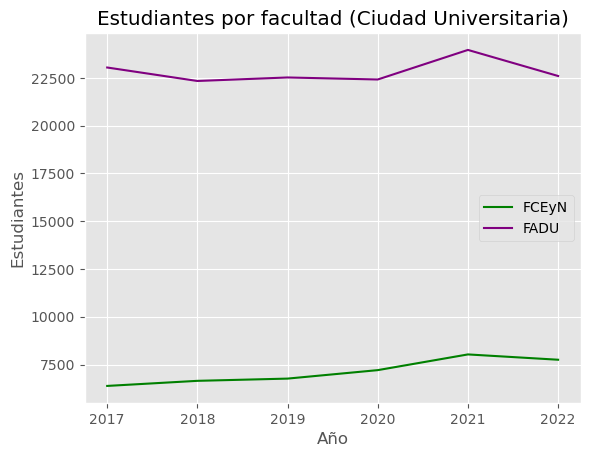

In [28]:
plt.plot(estudiantes["Año"],exactas["Estudiantes Facultad"], color='green', label="FCEyN")
plt.plot(estudiantes["Año"],fadu["Estudiantes Facultad"], color='purple', label="FADU")
plt.xlabel('Año')
plt.ylabel('Estudiantes')
plt.title('Estudiantes por facultad (Ciudad Universitaria)')
plt.legend()
plt.show()

In [29]:
# Replicamos lo que hicimos con sube 2023 para sube 2022

sube_2022 = pd.read_csv("./datasets/sube-2022.csv")
datos_amba_2022 = (
    df.copy()
    .query("DATO_PRELIMINAR != 'SI' and AMBA == 'SI'")
    .drop(
        columns=["DATO_PRELIMINAR", "AMBA", "PROVINCIA", "NOMBRE_EMPRESA", "MUNICIPIO"]
    )
    .reset_index(drop=True)
)

datos_amba_2022.columns = datos_amba_2022.columns.str.lower()
datos_amba_2022 = datos_amba_2022.rename(
    columns={"cantidad": "pasajeros", "dia_transporte": "fecha"}
)
datos_amba_2022 = datos_amba_2022.reindex(sorted(datos_amba_2022.columns), axis=1)

datos_amba_2022["fecha"] = pd.to_datetime(datos_amba_2022["fecha"])
datos_amba_2022["fecha_mes"] = datos_amba_2022["fecha"].dt.month
datos_amba_2022["fecha_ordinal"] = datos_amba_2022["fecha"].dt.day_of_year

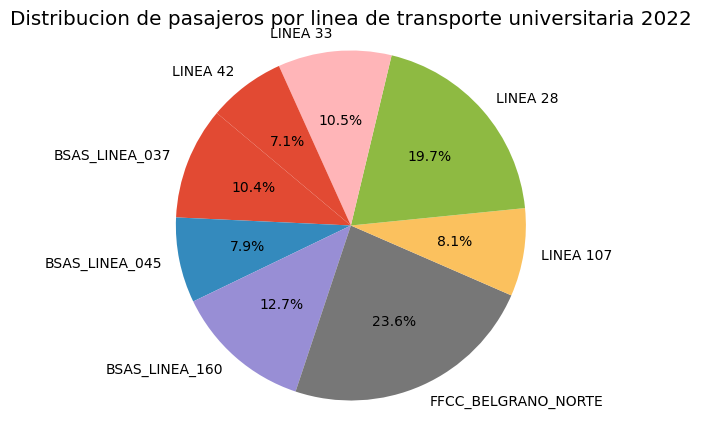

In [30]:
datos_amba_2022_universitaria = datos_amba_2022.query(
	"linea in @lineas_universitaria and fecha_dia != 'Domingo'"
)

datos_amba_2022_universitaria_ponderados = datos_amba_2022_universitaria.copy()
datos_amba_2022_universitaria_ponderados["peso"] = datos_amba_2022_universitaria_ponderados["linea"].map(pesos)
datos_amba_2022_universitaria_ponderados["pasajeros_ponderados"] = datos_amba_2022_universitaria_ponderados["pasajeros"] * datos_amba_2022_universitaria_ponderados["peso"]
pasajeros_totales_2022 = datos_amba_2022_universitaria_ponderados["pasajeros"].sum()
proporciones_2022 = datos_amba_2022_universitaria_ponderados.groupby("linea")["pasajeros"].sum() / pasajeros_totales_2022

plt.figure(figsize=(8, 5))
plt.pie(proporciones_2022, labels=proporciones_2022.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribucion de pasajeros por linea de transporte universitaria 2022")
plt.show()

In [58]:
estudiantes_totales_2022 = estudiantes.query("Año == 2022")["totales"].values[0]
print(
    f"En 2022, Se estima que {np.round(estudiantes_totales_2022 * proporciones_2022['FFCC_BELGRANO_NORTE']):.0f} estudiantes eligieron viajar en el ferrocarril BELGRANO NORTE"
)
print(
    f"En 2022, Se estima que {np.round(estudiantes_totales_2022 * proporciones_2022['LINEA 107']):.0f} estudiantes eligieron viajar en la línea 107"
)
print(
    f"En 2022, Se estima que {np.round(estudiantes_totales_2022 * proporciones_2022['LINEA 28']):.0f} estudiantes eligieron viajar en la línea 28"
)
print(
    f"En 2022, Se estima que {np.round(estudiantes_totales_2022 * proporciones_2022['LINEA 42']):.0f} estudiantes eligieron viajar en la línea 42"
)

En 2022, Se estima que 7155 estudiantes eligieron viajar en el ferrocarril BELGRANO NORTE
En 2022, Se estima que 2466 estudiantes eligieron viajar en la línea 107
En 2022, Se estima que 5970 estudiantes eligieron viajar en la línea 28
En 2022, Se estima que 2168 estudiantes eligieron viajar en la línea 42


# Parte 3: Modelado

In [32]:
df = pd.read_csv('./datasets/sube-2023-regresion.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323326 entries, 0 to 323325
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   323326 non-null  object
 1   NOMBRE_EMPRESA   323326 non-null  object
 2   LINEA            323326 non-null  object
 3   AMBA             323326 non-null  object
 4   TIPO_TRANSPORTE  323326 non-null  object
 5   JURISDICCION     321581 non-null  object
 6   PROVINCIA        321566 non-null  object
 7   MUNICIPIO        321566 non-null  object
 8   CANTIDAD         323326 non-null  int64 
 9   DATO_PRELIMINAR  323326 non-null  object
dtypes: int64(1), object(9)
memory usage: 24.7+ MB


**a)**

In [33]:
df = df.query(
    "TIPO_TRANSPORTE == 'COLECTIVO' and PROVINCIA == 'JN' and DATO_PRELIMINAR == 'NO' and AMBA == 'SI'"
)
df["DIA_TRANSPORTE"] = pd.to_datetime(df["DIA_TRANSPORTE"])
df["DIA_ORDINAL"] = df["DIA_TRANSPORTE"].dt.dayofyear

colectivos = df["LINEA"].unique()
pasajeros_por_linea = pd.DataFrame(index=df["DIA_ORDINAL"].unique(), columns=colectivos)

for linea in colectivos:
	pasajeros_por_linea[linea] = df.query("LINEA == @linea").groupby("DIA_ORDINAL")["CANTIDAD"].sum()

pasajeros_por_linea.head()

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 5,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA,LINEA 119
1,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,4832.0,4839,2449,2184,3797,5317,1882,1573.0,3210,NaN
2,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,20333.0,16221,10486,12774,17374,23250,10322,7345.0,19362,NaN
4,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,23041.0,18448,12193,13949,19860,26294,11981,7925.0,21784,NaN
5,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,23928.0,18481,12888,14668,21235,27216,11787,7597.0,22972,NaN
6,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,24247.0,19300,12703,14199,23472,27073,11567,7811.0,23411,NaN


**b)**

In [34]:
pasajeros_por_linea_clean = pasajeros_por_linea.dropna(axis=1)
pasajeros_por_linea_clean.columns = list(
    map(lambda c: c.replace(" ", "_"), pasajeros_por_linea_clean.columns)
)
pasajeros_por_linea_clean.head()

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA_4,LINEA_42,LINEA_44,LINEA_50,LINEA_6,LINEA_7,LINEA_76,LINEA_8,LINEA_099,LINEA_164_AMBA
1,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,2942,4029,4649,4839,2449,2184,3797,5317,1882,3210
2,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,15329,19072,20387,16221,10486,12774,17374,23250,10322,19362
4,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,17836,21609,23595,18448,12193,13949,19860,26294,11981,21784
5,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,18044,21993,23687,18481,12888,14668,21235,27216,11787,22972
6,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,18122,22421,23731,19300,12703,14199,23472,27073,11567,23411


**Desarrollo y Evaluación de Modelos**


Usaremos K-fold Cross-Validation para evaluar los distintos modelos.

In [35]:
print(f"Hay, en promedio, {pasajeros_por_linea_clean['BSAS_LINEA_009'].mean()} pasajeros por dia de la linea BSAS_LINEA_009")

Hay, en promedio, 26755.688 pasajeros por dia de la linea BSAS_LINEA_009


In [36]:
test_size = 0.2
random_state = 23

df_lineas_clean_train, df_lineas_clean_test = train_test_split(
    pasajeros_por_linea_clean, test_size=test_size, random_state=random_state
)

In [37]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

lr = linear_model.LinearRegression(fit_intercept=True)

**Modelo 1:**

Buscamos los 5 colectivos con mayor correlacion con la cantidad de pasajeros de la linea 9.
No usamos Ridge ya que es evidente que las variables son LI.

In [38]:
lineas_mejor_corr = pasajeros_por_linea_clean.corr()["BSAS_LINEA_009"].sort_values(ascending=False).head(6).tail(5)
lineas_mejor_corr

LINEA_101         0.976802
BSAS_LINEA_146    0.975382
LINEA_7           0.974210
BSAS_LINEA_024    0.973111
LINEA_107         0.972397
Name: BSAS_LINEA_009, dtype: float64

In [39]:
f1 = "BSAS_LINEA_009 ~ " + " + ".join(lineas_mejor_corr.index)

y1, X1 = model_matrix(Formula(f1), df_lineas_clean_train)

In [40]:
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

i = 0

for train_index, val_index in cv.split(df_lineas_clean_train):
	X_train, X_val, y_train, y_val = (
		X1.iloc[train_index],
		X1.iloc[val_index],
		y1.iloc[train_index],
		y1.iloc[val_index],
	)
	lr.fit(X_train, y_train)

	y_pred = lr.predict(X_val)
	rmse1[i] = np.sqrt(mean_squared_error(y_val, y_pred))
	i = i + 1

print(f"RMSE promedio: {rmse1.mean()}")

RMSE promedio: 1796.1528360559073


**Modelo 2:**

Usando como referencia esta [pagina](https://www.omnilineas.com.ar/buenos-aires/colectivos/bd.0000000005-drg-bhj-4jf-fyy-4tc-f9p), sabemos que el 28,20,75 y 45 estan "relacionados" por trayecto con el 9. Agregamos el 150 ya que sabemos que tambien pasa cerca [(fuente)](https://www.omnilineas.com.ar/buenos-aires/colectivos/bc.jyr1upgddj-4i9-fx3-9en-dnk-91c-dhm).

In [41]:
f2 = "BSAS_LINEA_009 ~ BSAS_LINEA_020 + BSAS_LINEA_045 + BSAS_LINEA_075 + BSAS_LINEA_128 + BSAS_LINEA_150 + LINEA_28"

y2, X2 = model_matrix(Formula(f2), df_lineas_clean_train)

rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

i = 0

for train_index, val_index in cv.split(df_lineas_clean_train):
	X_train, X_val, y_train, y_val = (
		X2.iloc[train_index],
		X2.iloc[val_index],
		y2.iloc[train_index],
		y2.iloc[val_index],
	)
	lr.fit(X_train, y_train)

	y_pred = lr.predict(X_val)
	rmse2[i] = np.sqrt(mean_squared_error(y_val, y_pred))
	i = i + 1

print(f"RMSE promedio: {rmse2.mean()}")

RMSE promedio: 2170.8664863503027


**Modelo 3:**

Revisando las lineas usadas en el modelo 1, vemos que algunas no tienen sentido (24 y 107), no se relacionan por trayecto. Nos quedamos con las mas representativas, que serian el 101 porque pasa por Villa Soldati y Retiro; el 146 porque para en Retiro; El 7 porque pasa cerca de Retiro. Por ultimo elegimos el 23 y el 75 por similitud de recorrido.

Luego, probamos con Ridge y GridSearch interaccionando todos con todos.

In [54]:
f3 = "BSAS_LINEA_009 ~ (LINEA_101 + BSAS_LINEA_146 + LINEA_7 + LINEA_23 + BSAS_LINEA_075) * (LINEA_101 + BSAS_LINEA_146 + LINEA_7 + LINEA_23 + BSAS_LINEA_075)"

alphas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 3])

y3, X3 = model_matrix(Formula(f3), df_lineas_clean_train)

In [43]:
alfas = np.logspace(-4, 4, 41)
param_grid = {"alpha": alfas}
mas_alfas = np.unique(np.concatenate([alfas, np.logspace(-4, 4, 41)]))
param_grid = {"alpha": mas_alfas}

gs = None

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gs = GridSearchCV(
        Ridge(),
        param_grid,
        cv=5,
        scoring="neg_root_mean_squared_error",
        return_train_score=True,
    )
    gs.fit(X3,y3)

print(f"Mejor alpha: {gs.best_params_['alpha']}")
print(f"Mejor RMSE: {-gs.best_score_}")

Mejor alpha: 10000.0
Mejor RMSE: 1982.2020063630466


**Modelo 4:**


Mismas lineas que el modelo 3, pero no tomamos en cuenta las interacciones

In [44]:
f4 = "BSAS_LINEA_009 ~ LINEA_101 + BSAS_LINEA_146 + LINEA_7 + LINEA_23 + BSAS_LINEA_075"

y4, X4 = model_matrix(Formula(f4), df_lineas_clean_train)

lr.fit(X4, y4)

rmse4 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

i = 0

for train_index, val_index in cv.split(df_lineas_clean_train):
    X_train, X_val, y_train, y_val = (
        X4.iloc[train_index],
        X4.iloc[val_index],
        y4.iloc[train_index],
        y4.iloc[val_index],
    )
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse4[i] = np.sqrt(mean_squared_error(y_val, y_pred))
    i = i + 1

print(f"RMSE promedio: {rmse4.mean()}")

RMSE promedio: 1796.313501238832


Comparamos entre el modelo 1 y el modelo 4.

In [51]:
print(f"RMSE1 promedio: {rmse1.mean()}")
print("--------------------------------------")
print(f"RMSE4 promedio: {rmse4.mean()}")

RMSE1 promedio: 1796.1528360559073
--------------------------------------
RMSE4 promedio: 1796.313501238832


Como el primer y cuarto modelo performan similarmente (Tienen $RMSE$  que difieren en el orden de $10^{-1}$), decidimos quedarnos con el cuarto modelo ya que las lineas elegidas para este tienen mas sentido pues son similares en trayecto con la linea 9.

In [55]:
y_test, X_test = (
    Formula(f4)
    .get_model_matrix(df_lineas_clean_test)
)

lr.fit(X_test, y_test)

# Predicciones
y_pred = lr.predict(X_test)

r2 = lr.score(X_test, y_pred)
print("R2:", r2)
ecm = mean_squared_error(y_test, y_pred)
print("sqrt(ecm):", np.sqrt(ecm))

R2: 1.0
sqrt(ecm): 2342.07648245939


**Conclusión**

Entonces, la formula del Modelo 4 es:

$$BSAS\_LINEA\_009 = \beta_{0} + \beta_{1}LINEA\_101 + \beta_{2}BSAS\_LINEA\_146 + \beta_{3}LINEA\_7 + \beta_{4}LINEA\_23 + \beta_{5}BSAS\_LINEA\_075$$
En notacion de Wilkinson-Rogers:
$$BSAS\_LINEA\_009 \sim LINEA\_101 + BSAS\_LINEA\_146 + LINEA\_7 + LINEA\_23 + BSAS\_LINEA\_075$$


---